In [1]:
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, clear_output, DisplayHandle

import ising
import multiprocess

In [2]:
DIM = [30, 30]
n_processors = 6

# Phase Transition

In [3]:
x = ising.ising(DIM)
x.info()
Op = [x.cellP[0], (tuple(x.DIM//2),0)]

Lattice dimension: 2
Lattice size: [30 30]
Spins are placed on: 0-cells
Interactions are placed on: 1-cells
No. of 0-cells in lattice: 900
No. of 1-cells in lattice: 1800


In [4]:
def interval(x, y, n):
    d = (y-x)/n
    I = []
    for i in range(n):
        I.append(x + i*d)
    return I

In [5]:
n_chunks = 3
N = n_processors * n_chunks

X = np.concatenate((interval(.1, .37, N//3), 
                    interval(.37, .5, len(range(N//3, (2*N)//3))),
                    interval(.5, .8, len(range((2*N)//3, N)))
                   ))
X_chunks = [X[i*n_processors:(i+1)*n_processors] for i in range(n_chunks)]

pool = multiprocess.Pool(processes=n_processors)

def ising_J(j):
    x = ising.ising(DIM)
    x.coupling = ising.const_field(x.cellP1, value=j)
    x.equilibrate(num_iterate=5*len(x.cellP), screen=ising.rand_screen())
    
    return x

models = []


for i, chunk in enumerate(X_chunks):
    clear_output()
    print('chunk no. {}/{}'.format(i+1, n_chunks))
    models += pool.map(ising_J, chunk)

'MC turn: 4451/4500'

'MC turn: 4451/4500'

'MC turn: 4451/4500'

'MC turn: 4451/4500'

'MC turn: 4451/4500'

'MC turn: 4451/4500'

chunk no. 3/3


In [6]:
Y = []
for i, model in enumerate(models):
    clear_output()
    print('model no. {}/{}'.format(i+1, len(models)))
    Y.append(model.expectation(Op, sample_size=500, n_processors=n_processors, quiet=False))

model no. 18/18


'E sample (J = 0.750): 500/500. running E: 0.996'

'E sample (J = 0.750): 500/500. running E: 0.996'

'E sample (J = 0.750): 500/500. running E: 0.996'

'E sample (J = 0.750): 500/500. running E: 0.996'

'E sample (J = 0.750): 500/500. running E: 0.996'

'E sample (J = 0.750): 500/500. running E: 0.996'

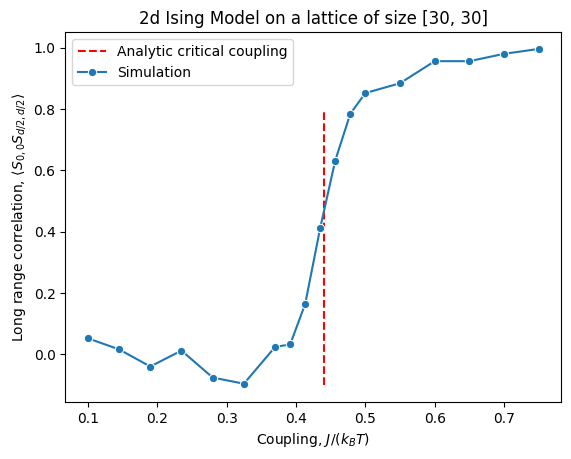

In [7]:
J_crit = math.log(1+math.sqrt(2))/2
ax = sns.lineplot(x=[J_crit, J_crit], y=[-.1, .8], estimator=None, linewidth=1.5, color='red', linestyle='dashed')
sns.lineplot(x=X, y=Y, ax=ax, marker='o')
ax.set(xlabel='Coupling, $J/(k_BT)$', ylabel='Long range correlation, $\\left\\langle S_{0,0} S_{d/2, d/2} \\right\\rangle$')
ax.set_title('2d Ising Model on a lattice of size ' + str(DIM))
plt.legend(labels=['Analytic critical coupling', 'Simulation'])
plt.show()